# DMS - Data Analysis

In [34]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from abag_affinity.utils.config import read_config, get_data_paths

In [35]:
config = read_config("../../config.yaml")

#summary_path, _ = get_data_paths(config, "DMS")

summary_path = os.path.join(config["DATA"]["path"], config["DATA"]["DMS"]["folder_path"], "dms_curated.csv")

dms_df = pd.read_csv(summary_path)

In [61]:
dms_df

,publication,antibody,mutation_code,antigen,-log(Kd),E,NLL,-log(IC50)
0,phillips21_bindin,cr6261,SD167R;ND196K;KD211D;SD214G;AD216V;LD241V,h1newcal99,9.444671,NaN,NaN,NaN
1,phillips21_bindin,cr6261,SD167R;ND196K;QD199P;KD211D;SD212F;AD216V;LD241V,h1newcal99,9.429218,NaN,NaN,NaN
2,phillips21_bindin,cr6261,SD167R;ND196K;KD211D;SD214G;LD241V,h1newcal99,9.099022,NaN,NaN,NaN
3,phillips21_bindin,cr6261,SD167R;KD211D;SD214G;AD216V,h1newcal99,9.322949,NaN,NaN,NaN
4,phillips21_bindin,cr6261,SD167R;QD199P;KD211D;AD216V,h1newcal99,8.612018,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
3530887,madan21_mutat_hiv,vfp1602,Kl112T,fp8v2,NaN,0.620726,0.230000,NaN
3530888,madan21_mutat_hiv,vfp1602,Kl112V,fp8v2,NaN,0.441545,0.438757,NaN
3530889,madan21_mutat_hiv,vfp1602,Kl112W,fp8v2,NaN,0.173714,0.230000,NaN
3530890,madan21_mutat_hiv,vfp1602,Kl112Y,fp8v2,NaN,0.402392,0.424312,NaN


In [71]:
dms_df[(dms_df["publication"] == "wu20_differ_ha_h3_h1") & (dms_df["mutation_code"] == "IB45T")]

,publication,antibody,mutation_code,antigen,-log(Kd),E,NLL,-log(IC50)
397751,wu20_differ_ha_h3_h1,cr9114,IB45T,h3hk68,6.783043,0.636106,NaN,NaN
403347,wu20_differ_ha_h3_h1,cr9114,IB45T,h3hk68,6.783043,0.636106,NaN,NaN
409140,wu20_differ_ha_h3_h1,cr9114,IB45T,h3hk68,NaN,0.636106,NaN,NaN
414736,wu20_differ_ha_h3_h1,cr9114,IB45T,h3hk68,NaN,0.636106,NaN,NaN


In [37]:
complexes = dms_df.groupby(["publication", "antibody", "antigen"])

### Number of mutations for complex

<AxesSubplot:ylabel='publication,antibody,antigen'>

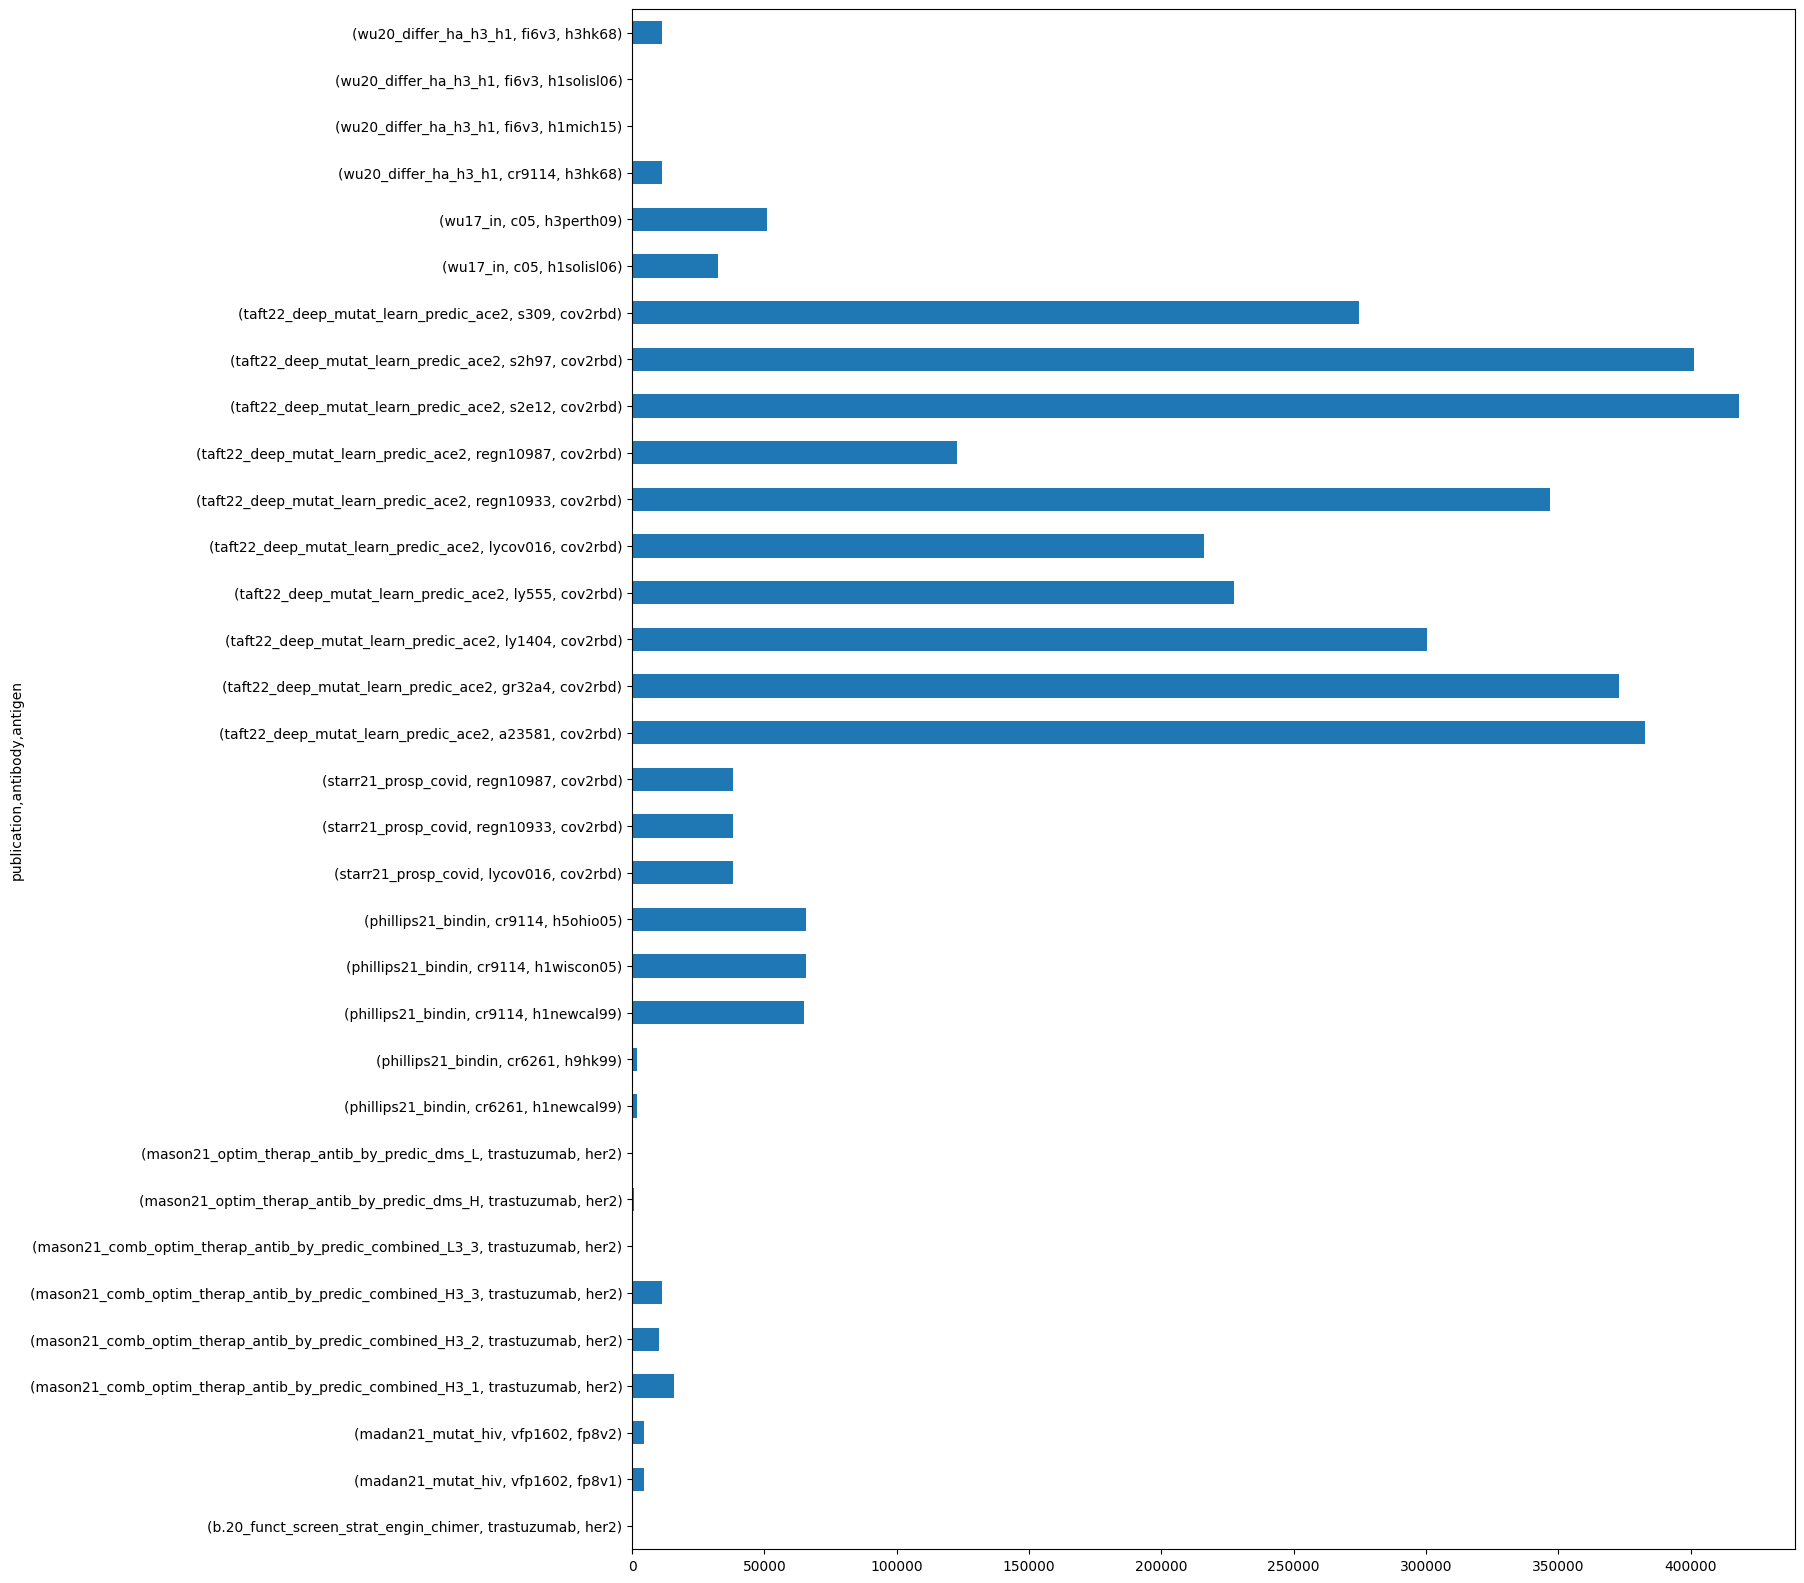

In [43]:
complexes["mutation_code"].count().plot(kind="barh", figsize=(15, 20))

## Distribution of affinity values

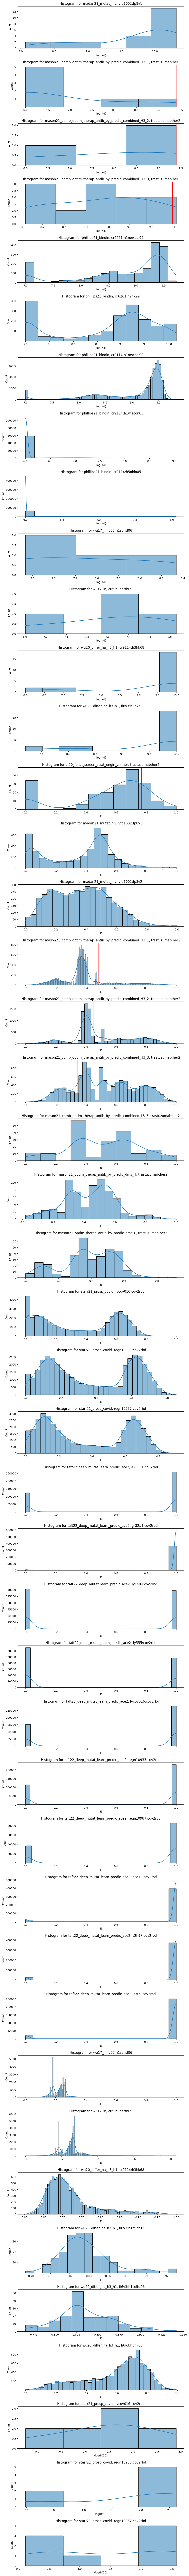

In [49]:
fig, axs = plt.subplots(figsize=(10,44 * 3), nrows=44)
fig.tight_layout(pad=4.0)

i = 0

for col in ["-log(Kd)","E", "-log(IC50)"]:

    for group, idx in complexes.groups.items():
        group_df = dms_df.iloc[idx]

        if any(group_df[col].notnull()):

            sns.histplot(group_df, x=col, kde=True, ax=axs[i]).set_title(f"Histogram for {group[0]}, {group[1]}:{group[2]}")
            
            wt_values = group_df.loc[group_df["mutation_code"].isna(), col].values
            if len(wt_values) > 0:
                for wt_value in wt_values:
                    if not np.isnan(wt_value):
                        axs[i].axvline(wt_value, color="red")
            i += 1


## Error analysis of generation process

In [50]:
generation_log_path = os.path.join(config["DATA"]["path"], 
                                   config["DATA"]["DMS"]["folder_path"], 
                                   config["DATA"]["DMS"]["mutated_pdb_path"],
                                  "{}/{}_{}.logs")


In [51]:
all_logs = []

for group, idx in complexes.groups.items():
    publication, antibody, antigen = group
    group_log_path = generation_log_path.format(publication, antibody, antigen)
    if os.path.exists(group_log_path):
        group_logs = pd.read_csv(group_log_path)
        group_logs["publication"] = publication
        group_logs["antibody"] = antibody
        group_logs["antigen"] = antigen
        all_logs.append(group_logs)
    else:
        print(f"No logs available for {publication}, {antibody}:{antigen}")
        
all_logs = pd.concat(all_logs)
all_logs.reset_index(inplace=True)

No logs available for b.20_funct_screen_strat_engin_chimer, trastuzumab:her2
No logs available for madan21_mutat_hiv, vfp1602:fp8v1
No logs available for madan21_mutat_hiv, vfp1602:fp8v2
No logs available for mason21_comb_optim_therap_antib_by_predic_combined_H3_1, trastuzumab:her2
No logs available for mason21_comb_optim_therap_antib_by_predic_combined_H3_2, trastuzumab:her2
No logs available for mason21_comb_optim_therap_antib_by_predic_combined_H3_3, trastuzumab:her2
No logs available for mason21_comb_optim_therap_antib_by_predic_combined_L3_3, trastuzumab:her2
No logs available for mason21_optim_therap_antib_by_predic_dms_H, trastuzumab:her2
No logs available for mason21_optim_therap_antib_by_predic_dms_L, trastuzumab:her2
No logs available for taft22_deep_mutat_learn_predic_ace2, a23581:cov2rbd
No logs available for taft22_deep_mutat_learn_predic_ace2, gr32a4:cov2rbd
No logs available for taft22_deep_mutat_learn_predic_ace2, ly1404:cov2rbd
No logs available for taft22_deep_mutat_l

In [52]:
failed_jobs = (all_logs["status"] != "processed").sum()
print(f"In total {failed_jobs} jobs fail of {len(all_logs)} jobs")

In total 10 jobs fail of 366272 jobs


In [53]:
all_logs[all_logs["status"] != "processed"]

,index,mutation_code,performed_mutations,status,error_msg,publication,antibody,antigen
324572,10147,QH110,NaN,NaN,NaN,wu17_in,c05,h1solisl06
343493,18920,QH110V;QH11,NaN,NaN,NaN,wu17_in,c05,h3perth09
354960,58,HF111M,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06
354961,59,HF111A,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06
354962,60,HF111Q,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06
354963,61,HF111V,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06
355049,147,HF111M,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06
355050,148,HF111A,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06
355051,149,HF111Q,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06
355052,150,HF111V,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06


#### Check if all files exist

In [54]:
generation_files_path = os.path.join(config["DATA"]["path"], 
                                   config["DATA"]["DMS"]["folder_path"], 
                                   config["DATA"]["DMS"]["mutated_pdb_path"],
                                  "all_generated_files.txt")

with open(generation_files_path) as f:
    lines = f.readlines()

lines = [ line.strip().split("/") for line in lines if line.strip()[-4:] == ".pdb"]
lines = [ {"publication": line[1], 
           "antibody": line[2].split("_")[0], 
           "antigen": line[2].split("_")[1],
           "mutation_code": line[3].split(".")[0]
          } for line in lines]

generated_files = pd.DataFrame(lines)

In [55]:
all_files = all_logs.merge(generated_files, how='left', indicator=True, on=["publication", "antibody", "antigen", "mutation_code"])
all_files[all_files["_merge"] != "both"]

,index,mutation_code,performed_mutations,status,error_msg,publication,antibody,antigen,_merge
324572,10147,QH110,NaN,NaN,NaN,wu17_in,c05,h1solisl06,left_only
343493,18920,QH110V;QH11,NaN,NaN,NaN,wu17_in,c05,h3perth09,left_only
354960,58,HF111M,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06,left_only
354961,59,HF111A,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06,left_only
354962,60,HF111Q,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06,left_only
354963,61,HF111V,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06,left_only
355049,147,HF111M,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06,left_only
355050,148,HF111A,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06,left_only
355051,149,HF111Q,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06,left_only
355052,150,HF111V,NaN,error,'HIS_D',wu20_differ_ha_h3_h1,fi6v3,h1solisl06,left_only


### Check for which files the performed mutation != mutation code

In [56]:
mutation_not_in_interface = len(all_logs[all_logs["mutation_code"] != all_logs["performed_mutations"]])
print(f"For {mutation_not_in_interface} of {len(all_logs)} ({round(mutation_not_in_interface/len(all_logs)*100, 2)}%) files not all mutations have been in the inferface_hull")

For 317215 of 366272 (86.61%) files not all mutations have been in the inferface_hull


In [57]:
num_all_complexes = len(all_logs.groupby(["publication", "antibody", "antigen", "mutation_code"]))
unique_complexes = len(all_logs.groupby(["publication", "antibody", "antigen", "performed_mutations"]))
print(f"{unique_complexes} of {num_all_complexes} ({round(unique_complexes/num_all_complexes*100, 2)}%) are unique mutations")

32276 of 349251 (9.24%) are unique mutations


### Get redudancy with AbAg Dataset

In [58]:
all_logs[all_logs["performed_mutations"] == "SD167R;KD211D;AD216V"]

,index,mutation_code,performed_mutations,status,error_msg,publication,antibody,antigen
4,4,SD167R;QD199P;KD211D;AD216V,SD167R;KD211D;AD216V,processed,NaN,phillips21_bindin,cr6261,h1newcal99
20,20,SD167R;KD211D;AD216V,SD167R;KD211D;AD216V,processed,NaN,phillips21_bindin,cr6261,h1newcal99
1891,4,SD167R;QD199P;KD211D;AD216V,SD167R;KD211D;AD216V,processed,NaN,phillips21_bindin,cr6261,h9hk99
1907,20,SD167R;KD211D;AD216V,SD167R;KD211D;AD216V,processed,NaN,phillips21_bindin,cr6261,h9hk99
